### import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
df=pd.read_excel('Churn_Analysis.xlsx')

In [3]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,No,Yes,No,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,No,No
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,No,Yes,Yes,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,No,No
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,No,Yes,No,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability


In [4]:
df.isnull().sum()

,0
Customer_ID,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,0
Phone_Service,0
Multiple_Lines,0


# Data Processing

In [5]:
# drop colmn that wont be used for prediction
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [6]:
# list of column to be label encode
columns_to_encode=['Gender', 'Married', 'State', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method'
]

In [7]:
# encode categorical variables except the target variables
label_encoders = {}
for column in columns_to_encode:
  label_encoders[column] = LabelEncoder()
  df[column] = label_encoders[column].fit_transform(df[column])


In [8]:
# manualy encode the target variable customer_status
df = df[df['Customer_Status'].isin([ 'Stayed','Churned'])]
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0,'Churned':1}).astype(int)

/tmp/ipython-input-8-3223322640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0,'Churned':1}).astype(int)


In [9]:
# split data into feature and target
x = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

In [10]:
# split data into trainig and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [11]:
# initialize the random forest classifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

# train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Evalute Model

In [12]:
# make predictions
y_pred = rf_model.predict(x_test)

confusion matrix:
[[791  50]
 [125 236]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



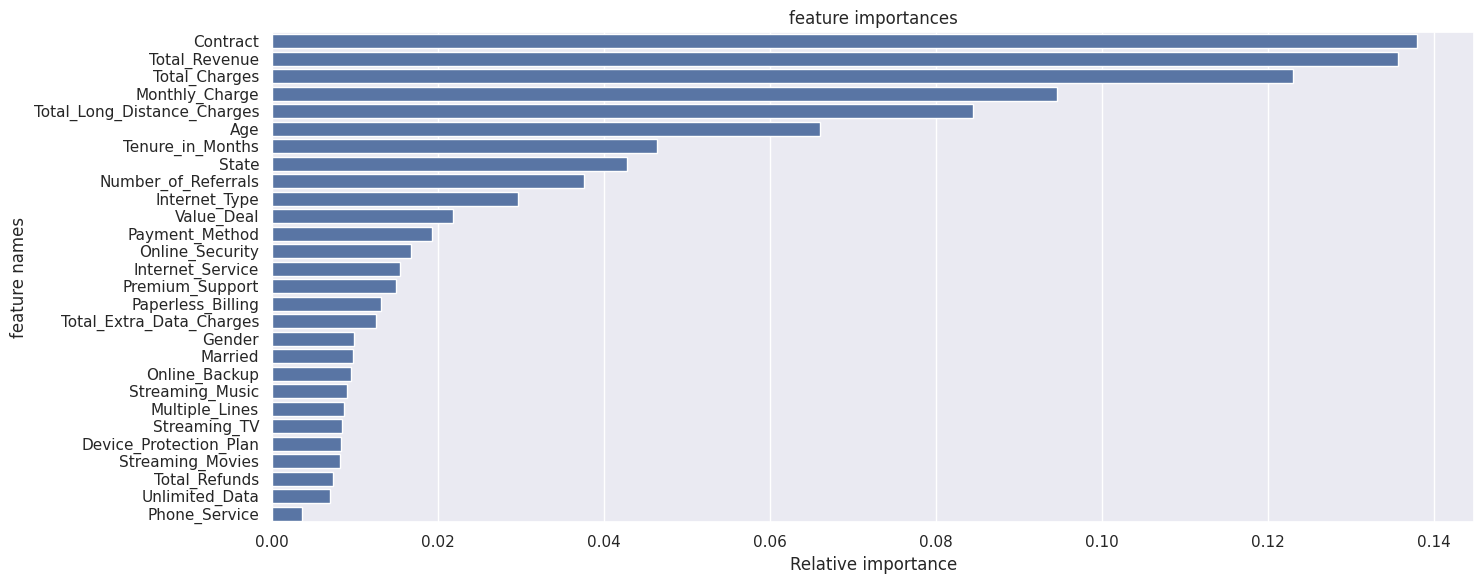

In [13]:
# evalute the model
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("\n Classification Report:")
print(classification_report(y_test,y_pred))

# feature selecting using feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

#plot the feature importance
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title("feature importances")
plt.xlabel("Relative importance")
plt.ylabel("feature names")
plt.tight_layout()
plt.show()